In [1]:
from datasets import load_dataset

/home/kuroro/py_envs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("Jiann/STORAL")

In [3]:
moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]

In [4]:
import pandas as pd
data = pd.DataFrame(moral)

In [5]:
stories = data["story"]

In [6]:
stories[0]

'A fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the fox\'s mouth watered as he gazed longingly at them. The bunch hung from a high branch, and the fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain. Now he sat down and looked at the grapes in disgust. "What a fool I am," He said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."And off he walked very, very scornfully. '

In [7]:
docs = data["moral"]

In [8]:
from sentence_transformers import SentenceTransformer, util
sentences = ["I'm happy", "I'm full of happiness"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Compute embedding for both lists
embedding_1 = model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

/home/kuroro/py_envs/lib/python3.12/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._cuda_getDeviceCount() > 0


tensor([[0.6003]])

In [13]:
docs[490]

'Honesty is valued by all, and when we are dishonest, people lose faith in us. '

In [18]:
target = "If you help others, they will help you."#docs[460]
result = []
dic = []
print(target)
embedding_1 = model.encode(target, convert_to_tensor=True)
for x in range(len(docs)):
    if not x == 460:
        embedding_2 = model.encode(docs[x], convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding_1, embedding_2)
        result.append(similarity.item())
        if similarity.item()>0.5:
            dic.append(x)
            print(docs[x])
            print(x)
            print(similarity)

dic = [102,155,415,568,785,811,814,872,923,933,961,988,1037,1062,1123,1456,1475,1761]

If you help others, they will help you.
Self help is the best help. Heaven helps those who help themselves. 
21
tensor([[0.6707]])
If you help others, they will help you. 
102
tensor([[1.]])
Be kind to others. 
111
tensor([[0.5193]])
Being helpful to others helps make friendships. 
146
tensor([[0.5004]])
You can get more things done with kindness. 
149
tensor([[0.5399]])
Be nice and try to help others. 
155
tensor([[0.5602]])
Always be ready to help someone who has helped you. 
174
tensor([[0.6696]])
The gods help them that help themselves. 
263
tensor([[0.5276]])
Self-help is always respected. 
376
tensor([[0.5615]])
God helps those who help themselves. 
390
tensor([[0.6377]])
Helping others brings the greatest happiness. 
415
tensor([[0.5460]])
You should try to help others when you can. 
568
tensor([[0.7957]])
Always be kind to people because you never know, when and how one can be of help to you in your time of need. 
648
tensor([[0.5601]])
Do good for others and it will come back 

In [19]:
dic = [102,155,415,568,785,811,814,872,923,933,961,988,1037,1062,1123,1456,1475,1761]

In [21]:
len(dic)

18

In [51]:
import re
import gensim
import nltk
from nltk.corpus import stopwords
import spacy

def preprocess(doc):

    def preprocess_text(text):
        text = re.sub('\s+', ' ', text)  # Remove extra spaces
        text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
        text = re.sub('\'', '', text)  # Remove apostrophes
        text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
        text = text.lower()  # Convert to lowercase
        return text

    # Download NLTK stopwords
    # nltk.download('stopwords')
    stop_words = stopwords.words('english')

    # Tokenize and remove stopwords
    def tokenize(text):
        tokens = gensim.utils.simple_preprocess(text, deacc=True)
        tokens = [token for token in tokens if token not in stop_words]
        return tokens

    # Load spaCy model
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def lemmatize(tokens):
        doc = nlp(" ".join(tokens))
        return [token.lemma_ for token in doc]

    
    pre_doc = preprocess_text(doc)
    pre_doc = tokenize(pre_doc)
    return lemmatize(pre_doc)


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_1142109/1701228539.py:10: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)  # Remove extra spaces
/tmp/ipykernel_1142109/1701228539.py:11: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('\S*@\S*\s?', '', text)  # Remove emails


In [24]:
r = preprocess(stories[dic[3]])
r = set(r)

[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
!pip install sematch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.2/587.2 kB 10.9 MB/s eta 0:00:00m eta 0:00:01
  Created wheel for sematch: filename=sematch-1.0.4-py3-none-any.whl size=9448811 sha256=20465a17bd1c28229b693541316fef457d4f750c51d4253fed72db6615377829
  Stored in directory: /home/kuroro/.cache/pip/wheels/3b/3d/08/c27210fd1dbee743aed77a579529302c02fc23d0e4a10949d4
Successfully built sematch


In [26]:
i = 0
r = preprocess(stories[dic[i]])
r = set(r)

tmp = []
for word in r:
        j = 0
        embedding_1 = model.encode(word, convert_to_tensor=True)
        for word2 in tmp:
            embedding_2 = model.encode(word2, convert_to_tensor=True)
            distance = util.pytorch_cos_sim(embedding_1, embedding_2)
            if distance > 0.75:
                j = 1
                break
                
        if not j == 1:
            tmp.append(word)

r1 = set(tmp)

[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
dic[8]

1651

In [27]:
my_dict = {}
for i in range(1,len(dic)):
    r = preprocess(stories[dic[i]])
    r = set(r)

    tmp = []
    for word in r:
        j = 0
        embedding_1 = model.encode(word, convert_to_tensor=True)
        for word2 in tmp:
            embedding_2 = model.encode(word2, convert_to_tensor=True)
            distance = util.pytorch_cos_sim(embedding_1, embedding_2)
            if distance > 0.75:
                j = 1
                break
                
        if not j == 1:
            tmp.append(word)

    r = set(tmp)
    
    for x in r:
        j = 0
        embedding_2 = model.encode(x, convert_to_tensor=True)
        for key in my_dict:
            embedding_1 = model.encode(key, convert_to_tensor=True)
            distance = util.pytorch_cos_sim(embedding_1, embedding_2)
            if distance > 0.75:
                j = 1
                my_dict[key] += 1
                break
        if j == 0:
            my_dict[x]=1

[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-t

In [31]:
my_dic2 = my_dict

In [33]:
target = docs[102]
test = docs[10]

embedding_1 = model.encode(target, convert_to_tensor=True)
embedding_2 = model.encode(test, convert_to_tensor=True)
similarity = util.pytorch_cos_sim(embedding_1, embedding_2)
print(similarity)

tensor([[0.1644]])


In [43]:
!pip install tqdm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [76]:
result_list = []
from tqdm import tqdm
for i in tqdm(range(500)):

    if i in dic:
        continue
    
    r = preprocess(stories[i])
    t = {}
    for x in r:
        embedding_2 = model.encode(x, convert_to_tensor=True)
        for key in my_dict:
            embedding_1 = model.encode(key, convert_to_tensor=True)
            distance = util.pytorch_cos_sim(embedding_1, embedding_2)
            if distance > 0.75:

                if my_dict[key] in t.keys():
                    t[my_dict[key]] += 1
                else:
                    t[my_dict[key]] = 1
                break
    result_list.append(t)

 78%|███████████████████████████▍       | 392/500 [17:11:59<4:44:19, 157.96s/it]


KeyboardInterrupt: 

In [77]:
len(result_list)

390

In [78]:
similarity_list = []

target = "If you help others, they will help you."#docs[460]
embedding_1 = model.encode(target, convert_to_tensor=True)
x = 0
i = 0
while i < len(result_list):
        if not x in dic:
            
            embedding_2 = model.encode(docs[x], convert_to_tensor=True)
            similarity = util.pytorch_cos_sim(embedding_1, embedding_2)
            similarity_list.append(similarity.item())
            i += 1
        x += 1 
     

In [81]:
x

392

In [79]:
len(similarity_list)

390

In [82]:
score_list = []
for x in range(len(result_list)):
    score = 0
    for key in result_list[x]:
        score += (key-1)*key*key*result_list[x][key]

    r = preprocess(stories[x])
    score = score/len(r)
    score_list.append(score)

In [83]:
import numpy as np

list1 = similarity_list
list2 = score_list

# Calculate the correlation matrix
correlation = np.corrcoef(list1, list2)[0, 1]
correlation

np.float64(0.04413619033627102)

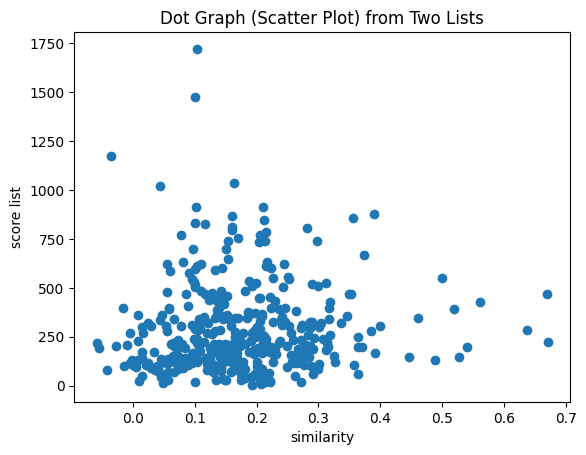

In [85]:
import matplotlib.pyplot as plt

# Your two lists of data (must be of the same length)
x_data = similarity_list
y_data = score_list

# Create the scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title
plt.xlabel('similarity')
plt.ylabel('score list')
plt.title('Dot Graph (Scatter Plot) from Two Lists')

# Display the plot
plt.show()

In [167]:
stories[1651]

'Lifesometimes one creates a dynamic impression by saying something and sometimes one creates as significant an impression by remaining silent. '

In [162]:
r = preprocess(stories[1651])
r = set(r)
print(len(r))

11


[nltk_data] Downloading package stopwords to /home/kuroro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
score/len(r)

1.6603773584905661

In [92]:
embedding_1 = model.encode("terrible", convert_to_tensor=True)
embedding_2 = model.encode("bad", convert_to_tensor=True)
print(util.pytorch_cos_sim(embedding_1, embedding_2))

tensor([[0.7928]])


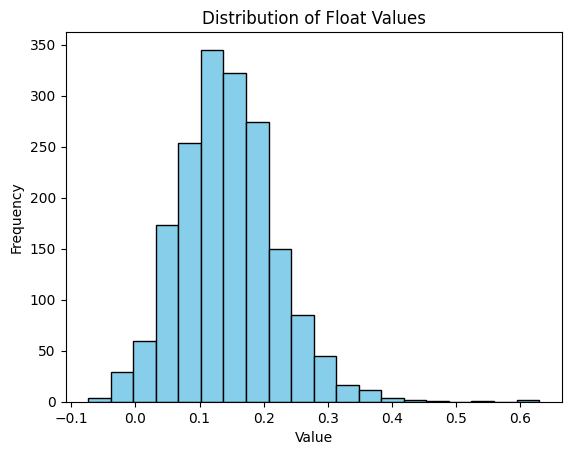

In [28]:
import matplotlib.pyplot as plt


# Create a sample list of float values
# For demonstration, we'll generate 1000 random floats between 0 and 10

# Create the histogram
plt.hist(result, bins=20, color='skyblue', edgecolor='black')

# Add labels and a title for clarity
plt.title('Distribution of Float Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()